## Analisis Univariat, Bivariat, & Multivariat
Sumber data: https://medium.com/mlearning-ai/univariate-bivariate-and-multivariate-data-analysis-in-python-341493c3d173

In [2]:
# import library yang relevan

# untuk tabulasi data dataframe
import pandas as pd
# untuk operasi perhitungan matematis
import numpy as np
# untuk visualisasi data 2D
import matplotlib.pyplot as plt
# untuk visualisasi data 3D
import seaborn as sns
# untuk implementasi rumus math
import math

In [18]:
# read data
card_approval_df = pd.read_csv("credit_card_approvals.csv")

#cek 5 data teratas
card_approval_df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [5]:
card_approval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [6]:
# cek duplikasi data
card_approval_df.duplicated().sum()

0

## Univariat Analysis

In [8]:
card_approval_df[['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']].describe()

,Age,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.000000,690.00000,690.000000
mean,31.514116,4.758725,2.223406,2.40000,1017.385507
std,11.860245,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


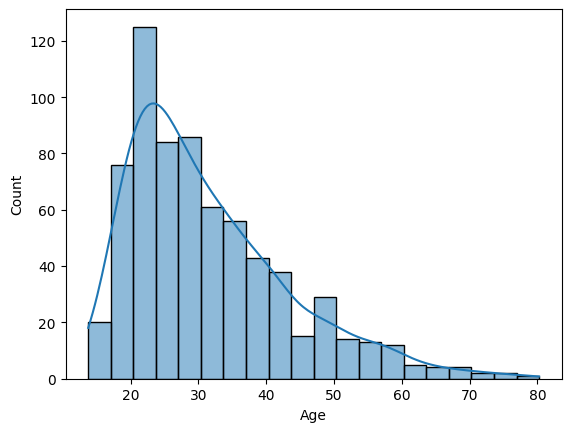

In [10]:
sns.histplot(card_approval_df.Age,kde=True);

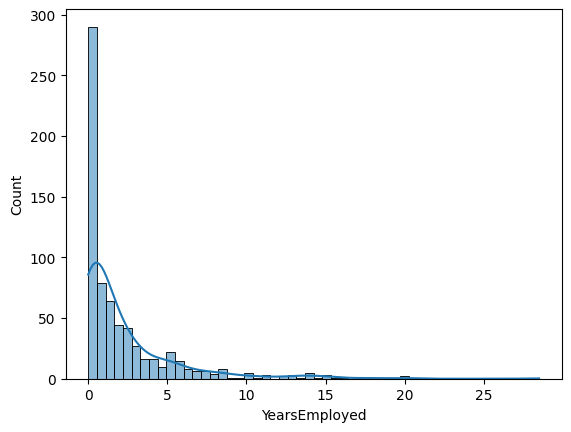

In [11]:
sns.histplot(card_approval_df.YearsEmployed,kde=True);

## Univrait analysis kategorikal data

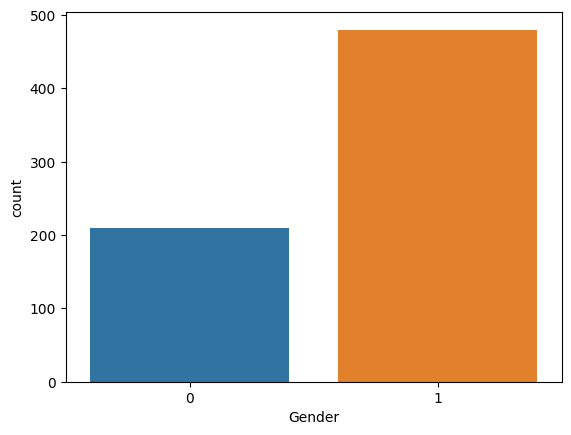

In [27]:
# plot hitung kolom jenis kelamin
sns.countplot(x=card_approval_df["Gender"]);

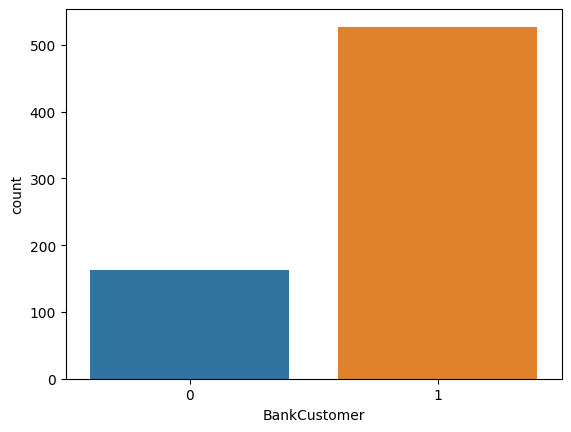

In [32]:
# plot hitung kolom BankCustomer
sns.countplot(x=card_approval_df["BankCustomer"]);

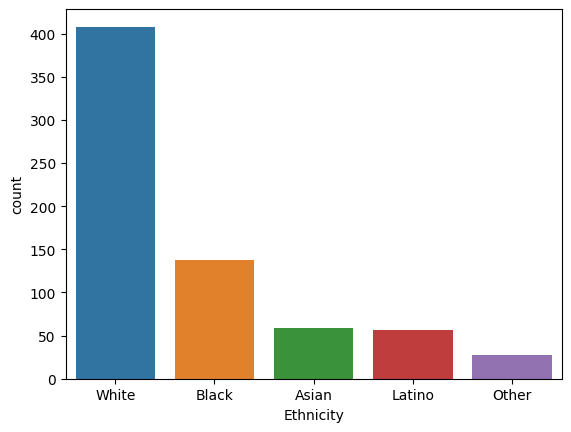

In [33]:
# plot hitung kolom Ethnicity
sns.countplot(x=card_approval_df["Ethnicity"]);

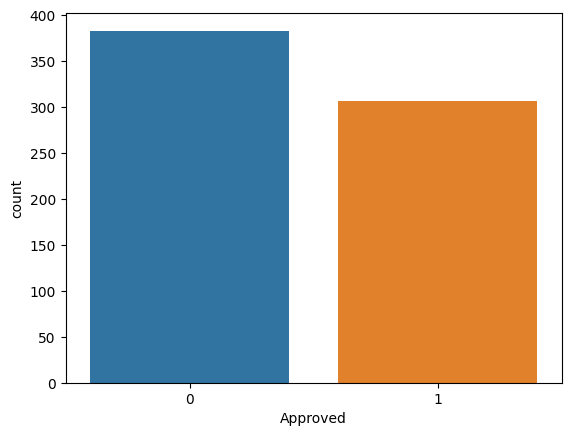

In [34]:
# plot hitung kolom approved
sns.countplot(x=card_approval_df["Approved"]);

## Bivariat Analysis

In [36]:
card_approval_df[['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']].corr()

,Age,Debt,YearsEmployed,CreditScore,Income
Age,1.000000,0.202177,0.391464,0.187327,0.018719
Debt,0.202177,1.000000,0.298902,0.271207,0.123121
YearsEmployed,0.391464,0.298902,1.000000,0.322330,0.051345
CreditScore,0.187327,0.271207,0.322330,1.000000,0.063692
Income,0.018719,0.123121,0.051345,0.063692,1.000000


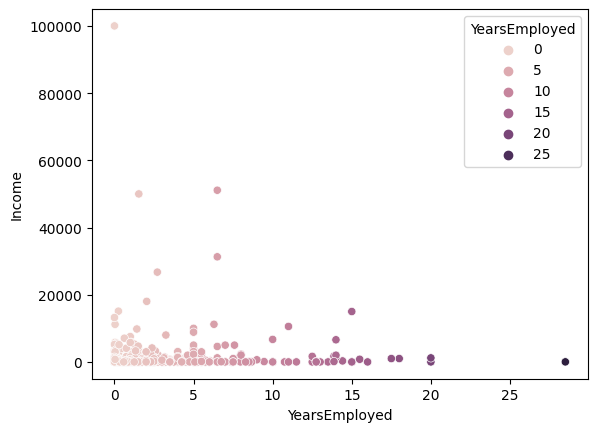

In [51]:
# sns.scatterplot(card_approval_df.YearsEmployed, card_approval_df.Income)
ax=sns.scatterplot(x='YearsEmployed',y='Income', hue = "YearsEmployed", data=card_approval_df)
plt.show()
# plt.ylim(0,200000);

## Analisa bivariat kategorikal Vs. analisa bivariat Kontinyu

In [53]:
card_approval_df.groupby(by="Approved").agg("mean")[["Age","Debt","YearsEmployed", "CreditScore", "Income"]]

C:\Users\parzival\AppData\Local\Temp\ipykernel_1316\316236792.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  card_approval_df.groupby(by="Approved").agg("mean")[["Age","Debt","YearsEmployed", "CreditScore", "Income"]]


,Age,Debt,YearsEmployed,CreditScore,Income
Approved,,,,,
0,29.773029,3.839948,1.257924,0.631854,198.605744
1,33.686221,5.904951,3.427899,4.605863,2038.859935


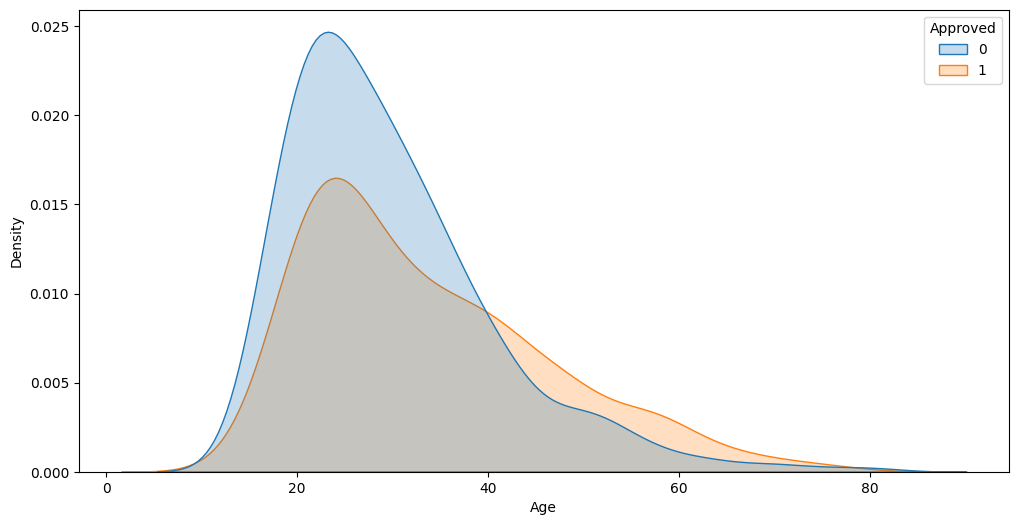

In [55]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=card_approval_df, x="Age", hue="Approved", fill=True);

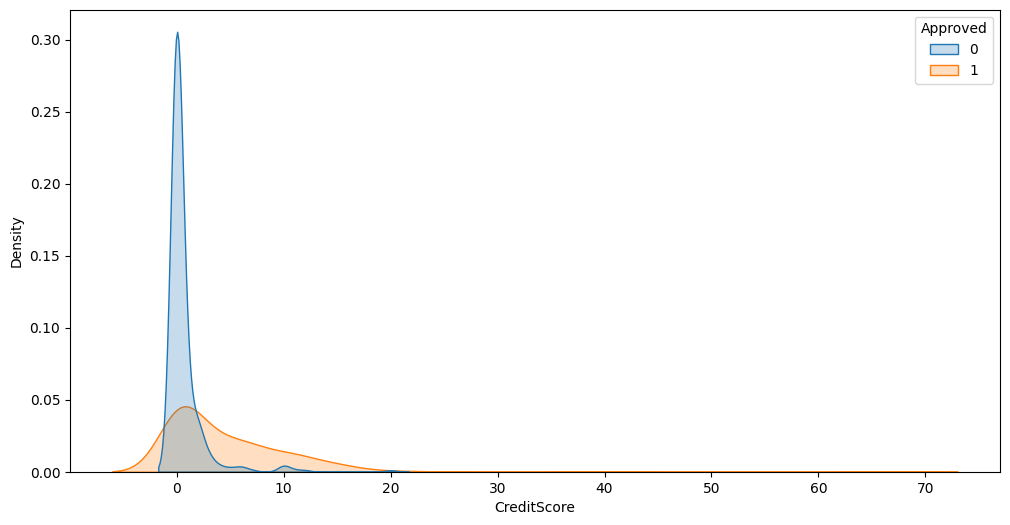

In [56]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=card_approval_df, x="CreditScore", hue="Approved", fill=True);

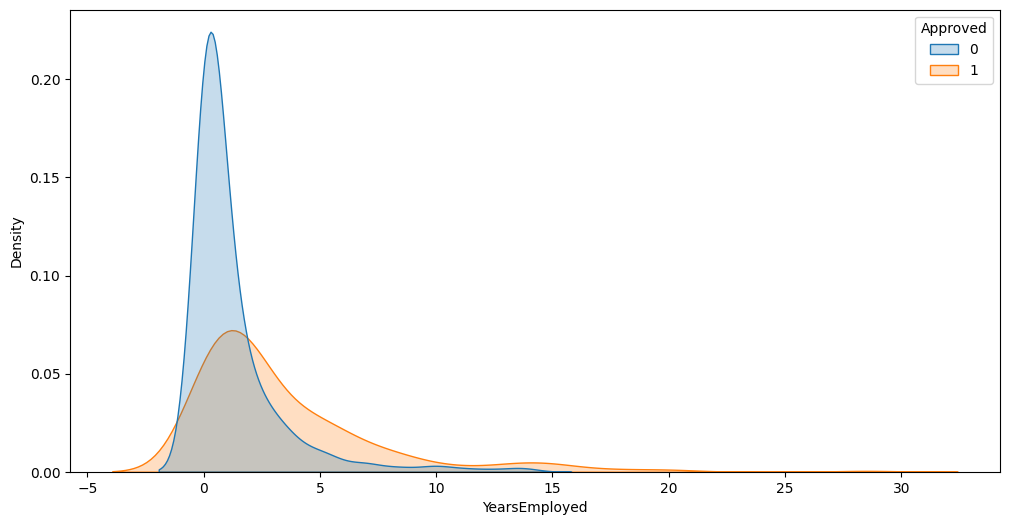

In [57]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=card_approval_df, x="YearsEmployed", hue="Approved", fill=True);

## Bivariat analisis Kategori & Kategori

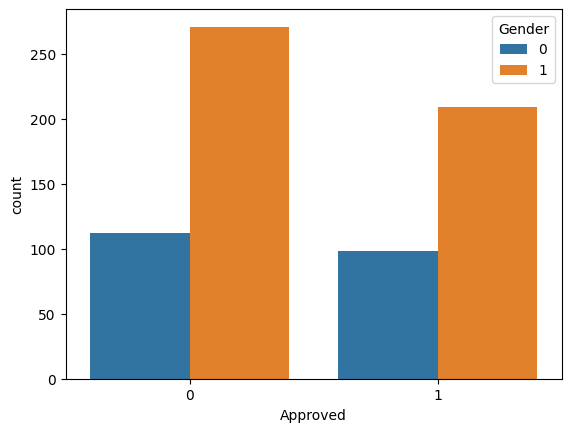

In [58]:
sns.countplot(data=card_approval_df, x="Approved", hue="Gender");

In [60]:
pd.crosstab(card_approval_df.Gender, card_approval_df.Approved, margins=True)

Approved,0,1,All
Gender,,,
0,112,98,210
1,271,209,480
All,383,307,690


In [61]:
all = pd.crosstab(card_approval_df.Gender, card_approval_df.Approved, margins=True)['All']
pd.crosstab(card_approval_df.Gender, card_approval_df.Approved).divide(all, axis=0).dropna()

Approved,0,1
Gender,,
0,0.533333,0.466667
1,0.564583,0.435417


In [63]:
card_approval_df.groupby(by="Approved").agg("mean")[["Age", "YearsEmployed", "CreditScore", "Income"]]

C:\Users\parzival\AppData\Local\Temp\ipykernel_1316\1890351121.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  card_approval_df.groupby(by="Approved").agg("mean")[["Age", "YearsEmployed", "CreditScore", "Income"]]


,Age,YearsEmployed,CreditScore,Income
Approved,,,,
0,29.773029,1.257924,0.631854,198.605744
1,33.686221,3.427899,4.605863,2038.859935


## Multivariat 

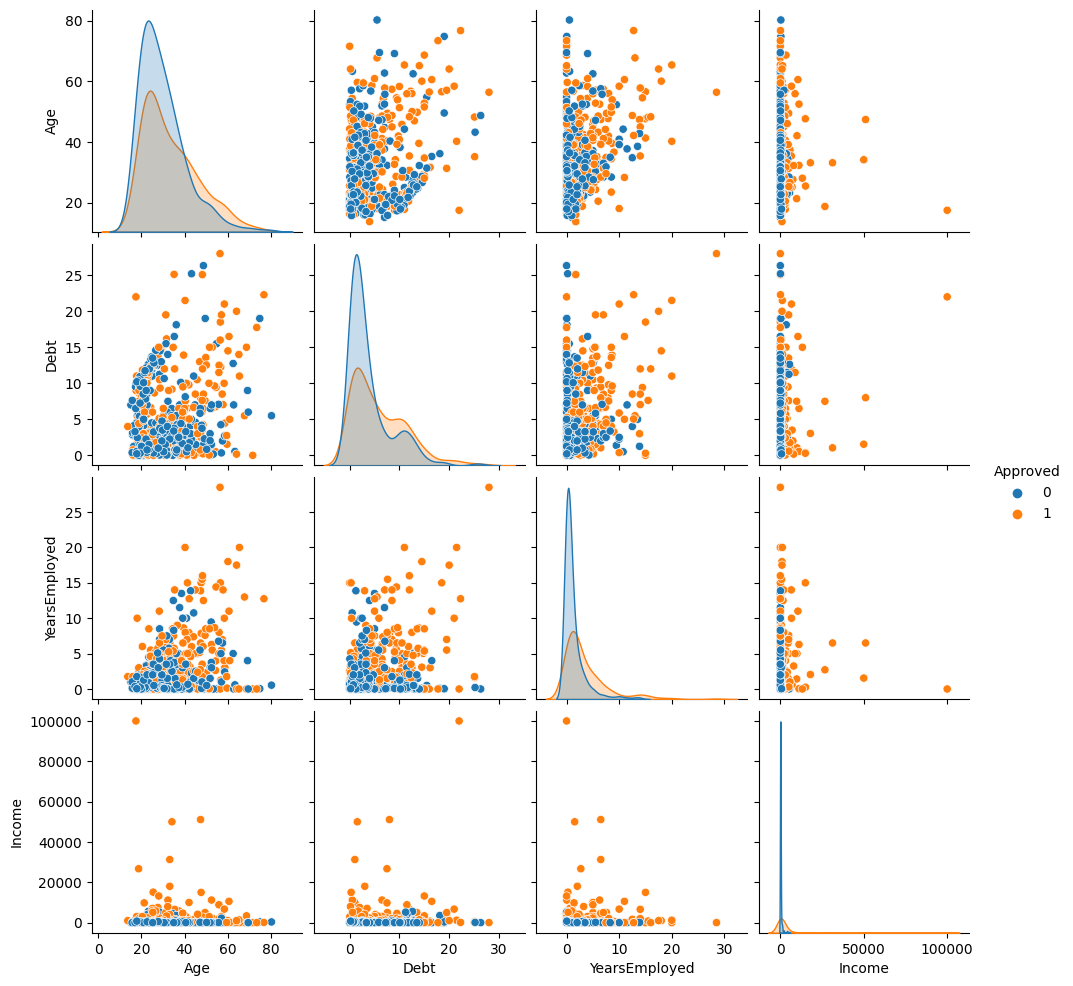

In [65]:
sns.pairplot(data=card_approval_df[["Age", "Debt", "YearsEmployed", "Income", "Approved"]], hue="Approved");